this is model 2, model 1 is not implemented in code anymore

In [1]:
import numpy as np
import tensorflow as tf
from keras import layers, activations
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    './data/RiceLeafsDisease/train',
    image_size=(128, 128),
    batch_size=8
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    './data/RiceLeafsDisease/validation',
    image_size=(128, 128),
    batch_size=8
)

Found 2100 files belonging to 6 classes.
Found 528 files belonging to 6 classes.


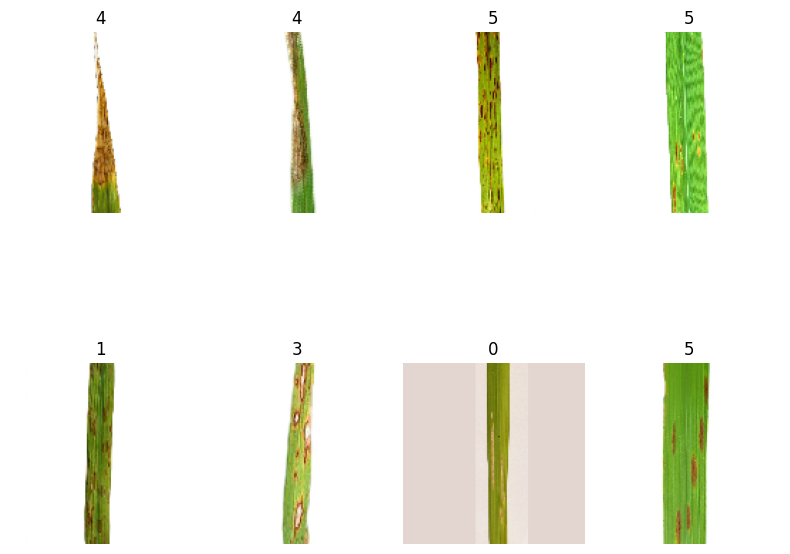

In [4]:
import matplotlib.pyplot as plt
images, labels = next(iter(train_ds))
fig, ax = plt.subplots(2,4)
fig.set_figwidth(8)
fig.set_figheight(8)

for i in range(8):
    r = i//4
    c = i%4

    ax[r][c].imshow(images[i].numpy().astype("uint8"))
    ax[r][c].set_title(str(labels[i].numpy()))
    ax[r][c].axis("off")

plt.tight_layout()
plt.show()



In [5]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

classes = 6
test_ds = test_ds.map(lambda x, y: (x/255.0, tf.one_hot(y,depth=classes)))
train_ds = train_ds.map(lambda x, y: (data_augmentation(x/255.0, training=True), tf.one_hot(y,depth=classes)))

In [13]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(128,128,3)),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(6, activation='softmax')
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss= tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [14]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,        # Hentikan jika val_loss tidak membaik selama 3 epoch
    restore_best_weights=True
)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=50,        # Bisa lebih tinggi, early stopping yang kontrol
    callbacks=[early_stop]
)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()